In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_csv(r"C:\Users\hannah\Downloads\archive (2)\heart_disease.csv")

if "num" in df.columns:
    df.rename(columns={"num":"target"}, inplace=True)
df["target"] = (df["target"] > 0).astype(int)

df.head()


,PC1,PC2,PC3,PC4,PC5,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2,target
0,1.496685,0.577233,0.554208,-1.876531,-0.326541,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,1.318520,0.099295,0.295348,-0.495299,1.066778,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,2.431917,-0.863635,0.533078,-0.264528,-0.071844,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.544862,1.156245,0.110919,0.002982,1.220034,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,0.379464,-1.195003,-0.658786,-0.245751,1.218672,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [4]:
X = df.drop(columns=["target"])
y = df["target"]


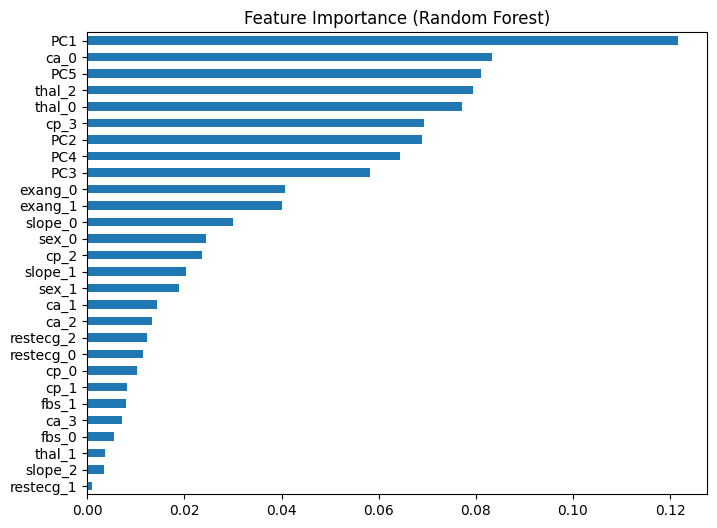

Top features:
 PC1       0.121554
ca_0      0.083396
PC5       0.081026
thal_2    0.079433
thal_0    0.077089
cp_3      0.069407
PC2       0.068953
PC4       0.064353
dtype: float64


In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.show()

print("Top features:\n", importances.sort_values(ascending=False).head(8))


In [6]:
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]
print("Selected by RFE:", list(rfe_features))


Selected by RFE: ['sex_0', 'sex_1', 'cp_3', 'exang_1', 'slope_0', 'ca_0', 'ca_2', 'thal_2']


In [7]:
X_scaled = MinMaxScaler().fit_transform(X)
chi2_selector = SelectKBest(score_func=chi2, k=8)
chi2_selector.fit(X_scaled, y)
chi2_features = X.columns[chi2_selector.get_support()]
print("Selected by Chi-Square:", list(chi2_features))


Selected by Chi-Square: ['cp_2', 'cp_3', 'exang_1', 'slope_0', 'slope_1', 'ca_0', 'thal_0', 'thal_2']


In [9]:
selected = set(rfe_features) | set(chi2_features)
print("Final selected features:", selected)

df_selected = df[list(selected) + ["target"]]
df_selected.to_csv(r"C:\Users\hannah\Downloads\archive (2)\heart_disease.csv", index=False)
print("✅ Saved selected features dataset.")


Final selected features: {'sex_1', 'thal_0', 'ca_2', 'thal_2', 'ca_0', 'slope_1', 'cp_2', 'slope_0', 'exang_1', 'sex_0', 'cp_3'}
✅ Saved selected features dataset.


In [11]:
selected = set(rfe_features) | set(chi2_features)
print("Final selected features:", selected)

df_selected = df[list(selected) + ["target"]]
df_selected.to_csv(r"C:\Users\hannah\Downloads\archive (2)\heart_disease.csv", index=False)
print("✅ Saved selected features dataset.")


Final selected features: {'sex_1', 'thal_0', 'ca_2', 'thal_2', 'ca_0', 'slope_1', 'cp_2', 'slope_0', 'exang_1', 'sex_0', 'cp_3'}
✅ Saved selected features dataset.
